In [5]:
using SaddleSearch, SaddleSearch.TestSets
using Plots 
Plots.pyplot()

Plots.PyPlotBackend()


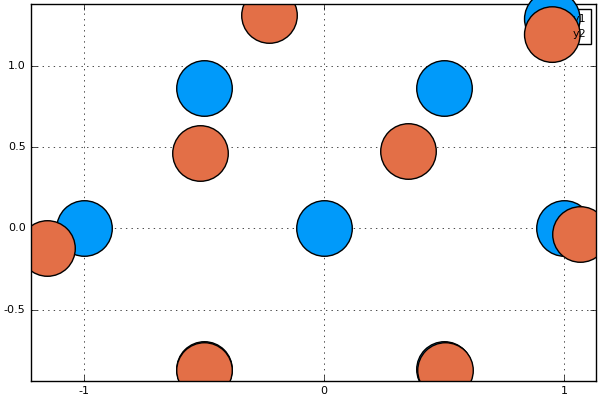

In [7]:
# generate objective and initial condition for saddle search 
V = LJcluster()
E, dE = objective(V)
x0, v0 = ic_dimer(V, :near)

# plot initial condition for saddle search 
R0 = hcat(SaddleSearch.TestSets.lj_refconfig()...)
X0 = reshape(x0, 2, length(x0)÷2)
plot(R0[1,:], R0[2,:], lw=0, marker=:c, markersize=40)
plot!(X0[1,:], X0[2,:], lw=0, marker=:c, markersize=40)


StaticDimer terminated unsuccesfully after 50 iterations.
StaticDimer terminates succesfully after 290 iterations



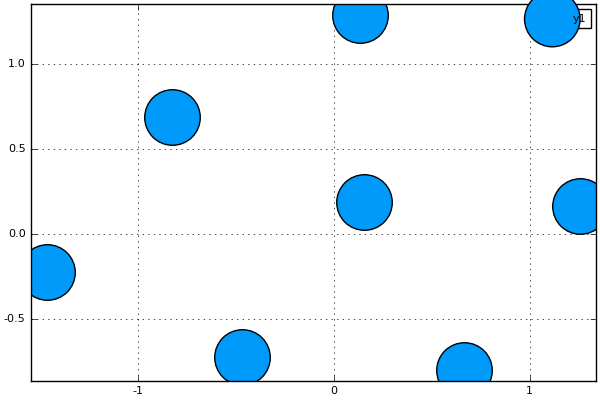

In [9]:
# a painful combination of static-dimer iterations.
verbose=1
# method = StaticDimer(a_trans=0.00001, a_rot = 0.00001, len = 1e-3, maxnit = 50, verbose=verbose)
# x, v, log = run!(method, E, dE, x0, v0);
method = StaticDimer(a_trans=0.001, a_rot = 0.001, len = 1e-3, maxnit = 50, verbose=verbose)
x, v, log = run!(method, E, dE, x0, v0);
method = StaticDimer(a_trans=0.02, a_rot = 0.02, len = 1e-3, maxnit = 1000, verbose=verbose)
x, v, log = run!(method, E, dE, x, v);
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)

BBDimer terminates succesfully after 59 iterations



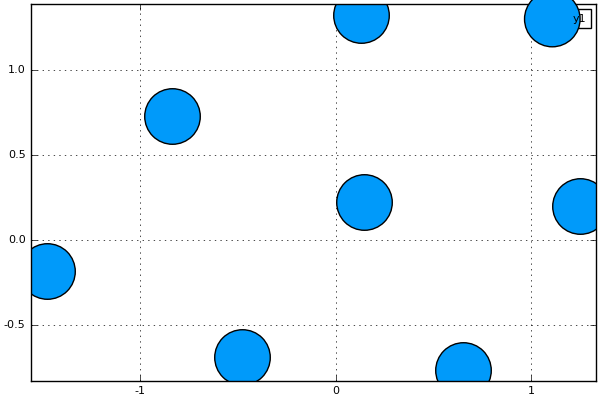

In [40]:
method = BBDimer(a0_trans=0.001, a0_rot = 0.001, len = 1e-3, maxnumdE = 1000, verbose=1)
x, v, log = run!(method, E, dE, x0, v0)
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)


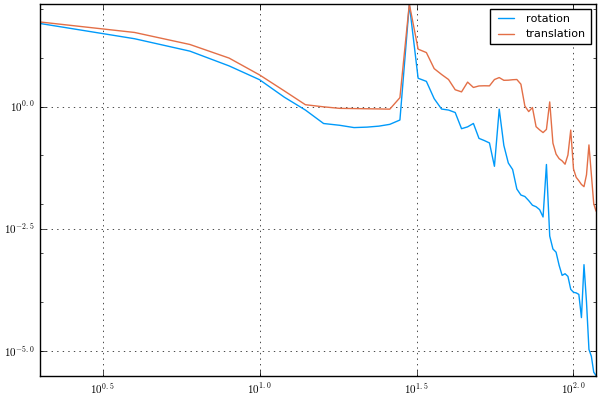

In [41]:
plot(log.numdE, log.res_trans, xscale=:log10, yscale=:log10, label="rotation")
plot!(log.numdE, log.res_rot, label="translation")

BBDimer terminates succesfully after 72 iterations



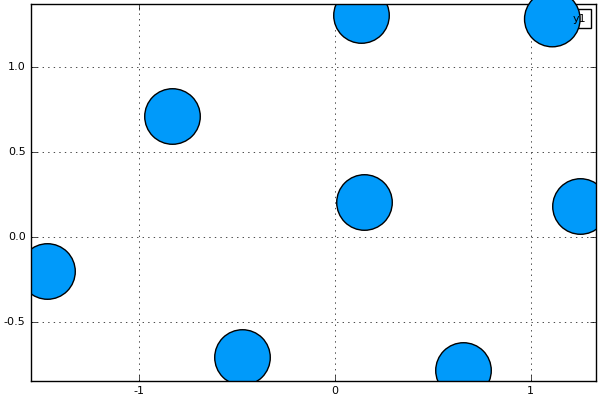

In [42]:
method = BBDimer(a0_trans=0.002, a0_rot = 0.002, len = 1e-3, maxnumdE = 1000, verbose=verbose, 
                ls = SaddleSearch.Backtracking())
x, v, log = run!(method, E, dE, x0, v0)
X = reshape(x, 2, length(x)÷2)
plot(X[1,:], X[2,:], lw=0, marker=:c, markersize=40)


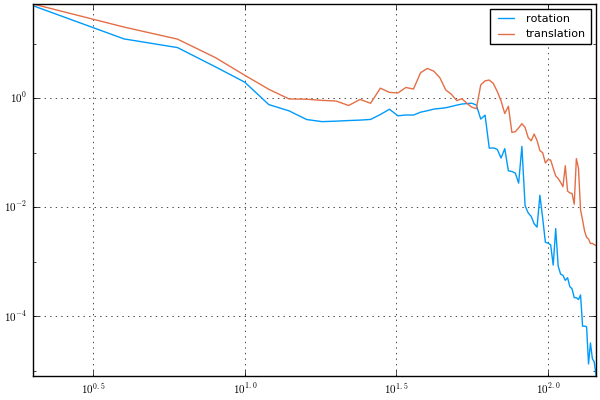

In [43]:
plot(log.numdE, log.res_trans, xscale=:log10, yscale=:log10, label="rotation")
plot!(log.numdE, log.res_rot, label="translation")